# Compute IP/EA with NWChem
Check on how the calculations are doing. What the run times are, what fractions have completed, etc.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from moldesign.simulate.qcfractal import GeometryDataset, SolvationEnergyDataset, HessianDataset, SinglePointDataset, collect_molecular_properties
import pandas as pd
import numpy as np

RDKit WARNING: [14:24:49] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
import os
qca_pwd = 'bTYl1h3cVYY_nQ2tGl3cuEWWnVNmL9WPoH9HF9_3-bQ'
os.environ['QCAUSR'] = qca_pwd

## Get the Geometries
Gather the XTB geometries

In [3]:
dataset = GeometryDataset('Electrolyte Geometry NWChem, 6-31G(2df,p)', 'normal_basis')

Print out the general status

In [4]:
dataset.coll.status()

,normal_basis
COMPLETE,9314
ERROR,2821
INCOMPLETE,60


Review the completed geometries

In [5]:
%%time
geoms = dataset.get_energies()
print(f'Completed {sum(map(len, geoms.values()))} geometries of {len(geoms)} molecules')
print(f'All ionic states computed for {sum(map(lambda x: len(x) == 3, geoms.values()))} molecules')

Completed 9314 geometries of 4015 molecules
All ionic states computed for 1878 molecules
CPU times: user 4.71 s, sys: 212 ms, total: 4.92 s
Wall time: 12.6 s


Plot the runtimes

In [6]:
runtimes = dataset.coll.df['normal_basis'].apply(lambda x: x.provenance.wall_time if x.status.value == "COMPLETE" else None)

In [7]:
runtimes = runtimes[runtimes != None]

Print statistics in minutes

In [8]:
(runtimes / 60).describe()

count    9314.000000
mean       54.021258
std        72.721420
min         0.515426
25%        11.586167
50%        28.630820
75%        67.118835
max       878.273858
Name: normal_basis, dtype: float64

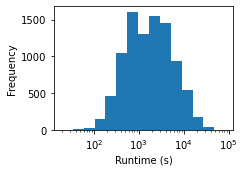

In [9]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

min_ = np.log10(runtimes.min())
max_ = np.log10(runtimes.max())
ax.hist(runtimes, bins=np.logspace(min_ - 0.2, max_ + 0.2, 16))

ax.set_xscale('log')
ax.set_xlabel('Runtime (s)')
ax.set_ylabel('Frequency')

fig.tight_layout()

## Review the ZPE Calculations
We ran Hessian calculations for each geometry

In [10]:
hess = HessianDataset('Electrolyte Hessian, 6-31G(2df,p)', 'nwchem', 'normal_basis')

Get the runtimes

In [11]:
%%time
records = hess.get_complete_records()
runtimes = records.apply(lambda x: x.provenance.wall_time)

CPU times: user 8.72 s, sys: 3.03 s, total: 11.8 s
Wall time: 1min 50s


Print statistics in minutes

In [12]:
(runtimes / 60).describe()

count    9185.000000
mean       69.128135
std       131.972596
min         0.291640
25%        15.537958
50%        31.522822
75%        86.640939
max      4023.745550
Name: record, dtype: float64

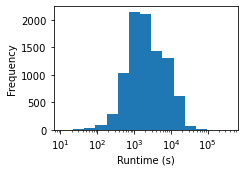

In [13]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

min_ = np.log10(runtimes.min())
max_ = np.log10(runtimes.max())
ax.hist(runtimes, bins=np.logspace(min_ - 0.2, max_ + 0.2, 16))

ax.set_xscale('log')
ax.set_xlabel('Runtime (s)')
ax.set_ylabel('Frequency')

fig.tight_layout()

## Review the Solvation Energy Calculations
Compute the solvation energies for all of the molecules

In [14]:
solv_dataset = SolvationEnergyDataset('EDW NWChem Solvation Energy, 6-31G(2df,p)', 'nwchem', 'normal_basis')

Pull down a summary

In [15]:
%%time
solv_energies = solv_dataset.get_energies()
solv_df = solv_dataset.coll.get_values()
print(f'Completed {(~solv_df.isnull()).values.sum()} solvation energies '
      f'of {len(solv_energies)} molecules')

Completed 0.0 solvation energies of 0 molecules
CPU times: user 68.2 ms, sys: 4.02 ms, total: 72.3 ms
Wall time: 70.3 ms


## Review Vertical Energies
Starting with the XTB geometry

In [16]:
xtb_vert = SinglePointDataset('Electrolyte XTB Neutral Geometry, Normal-Basis Energy', 'nwchem', 'normal_basis')

Pull down a summary

In [17]:
records = xtb_vert.get_complete_records()
runtimes = records.apply(lambda x: x.provenance.wall_time)
print(f'Completed {len(records)} single point energy computations')

Completed 0 single point energy computations


In [18]:
(runtimes / 60).describe()

count       0
unique      0
top       NaN
freq      NaN
Name: record, dtype: object

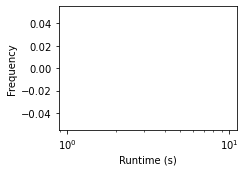

In [19]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

min_ = np.log10(runtimes.min())
max_ = np.log10(runtimes.max())
ax.hist(runtimes, bins=np.logspace(min_ - 0.2, max_ + 0.2, 16))

ax.set_xscale('log')
ax.set_xlabel('Runtime (s)')
ax.set_ylabel('Frequency')

fig.tight_layout()

Same thing, but with the SMB geometry

In [20]:
xtb_vert = SinglePointDataset('Electrolyte XTB Neutral Geometry, Normal-Basis Energy', 'nwchem', 'normal_basis')

Pull down a summary

In [21]:
records = xtb_vert.get_complete_records()
runtimes = records.apply(lambda x: x.provenance.wall_time)
print(f'Completed {len(records)} single point energy computations')

Completed 0 single point energy computations


In [22]:
(runtimes / 60).describe()

count       0
unique      0
top       NaN
freq      NaN
Name: record, dtype: object

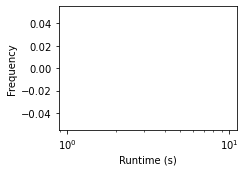

In [23]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

min_ = np.log10(runtimes.min())
max_ = np.log10(runtimes.max())
ax.hist(runtimes, bins=np.logspace(min_ - 0.2, max_ + 0.2, 16))

ax.set_xscale('log')
ax.set_xlabel('Runtime (s)')
ax.set_ylabel('Frequency')

fig.tight_layout()

## Generate Redox Properties
Compute the redox properties with and without ZPE

In [24]:
redox_data = collect_molecular_properties(dataset, solv_dataset)

RDKit WARNING: [14:29:03] Cannot assign bond directions!
RDKit WARNING: [14:29:11] Cannot assign bond directions!


In [25]:
redox_data.to_csv('datasets/normal-basis_no-zpe_redox.csv', index=False)

Repeat, but with ZPE

In [26]:
redox_data = collect_molecular_properties(dataset, solv_dataset, hess)

RDKit WARNING: [14:32:57] Cannot assign bond directions!
RDKit WARNING: [14:33:04] Cannot assign bond directions!


In [27]:
redox_data.to_csv('datasets/normal-basis_redox.csv', index=False)